In [1]:
# Import necessary libraries
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns



/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/minknow/miniconda3/envs/snakemake-tutorial/l

In [3]:
# Set up global settings for better visualization
sc.settings.verbosity = 3  # Set verbosity level to see detailed logs
sc.logging.print_header()  # Print Scanpy version info
sc.settings.set_figure_params(dpi=80, facecolor='white')  # Set figure quality

# Load the dataset
file_path = "mouse_bach_mammrygland.h5ad"  # Replace with your file path if different
adata = sc.read_h5ad(file_path)

# Inspect the dataset
print(adata)  # View basic information about the dataset
print("Available Observations:", adata.obs.keys())  # Check metadata in obs
print("Available Features:", adata.var.keys())  # Check gene features

# Step 1: Preprocessing
# Filter cells and genes based on quality metrics


scanpy==1.10.3 anndata==0.11.0 umap==0.5.7 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.5 pynndescent==0.5.13
AnnData object with n_obs × n_vars = 2915 × 27998
    obs: 'Barcode', 'Sample', 'Condition'
    var: 'Ensembl', 'Symbol', 'SEQNAME'
    uns: 'X_name'
Available Observations: Index(['Barcode', 'Sample', 'Condition'], dtype='object')
Available Features: Index(['Ensembl', 'Symbol', 'SEQNAME'], dtype='object')


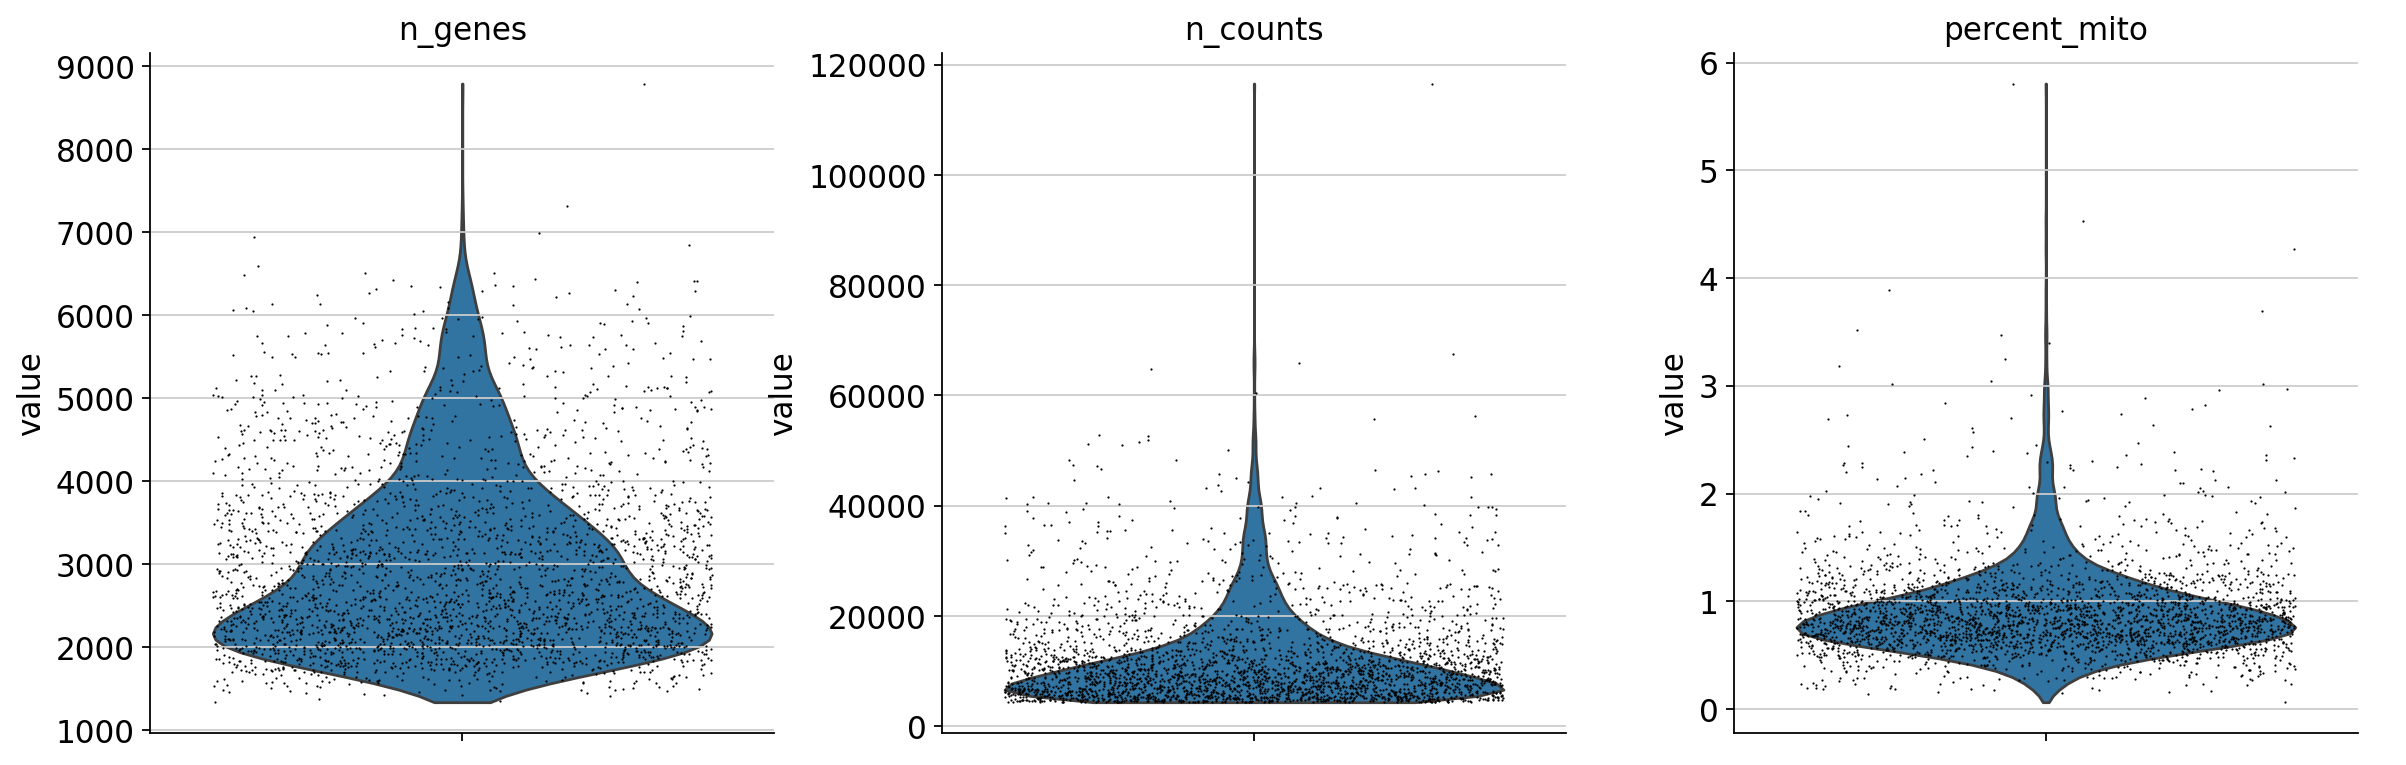

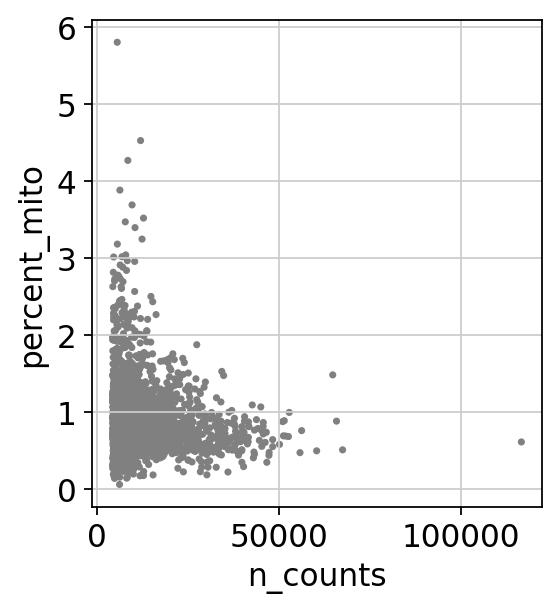

In [6]:
# Identify mitochondrial genes
mitochondrial_genes = [gene for gene in adata.var_names if gene.startswith("mt-")]

# Add a column in adata.var to indicate mitochondrial genes
adata.var['mito'] = adata.var_names.isin(mitochondrial_genes)

# Calculate the percentage of mitochondrial gene expression
adata.obs['percent_mito'] = (adata[:, adata.var['mito']].X.sum(axis=1).A1 / adata.obs['n_counts']) * 100

# Visualize QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='percent_mito')



normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


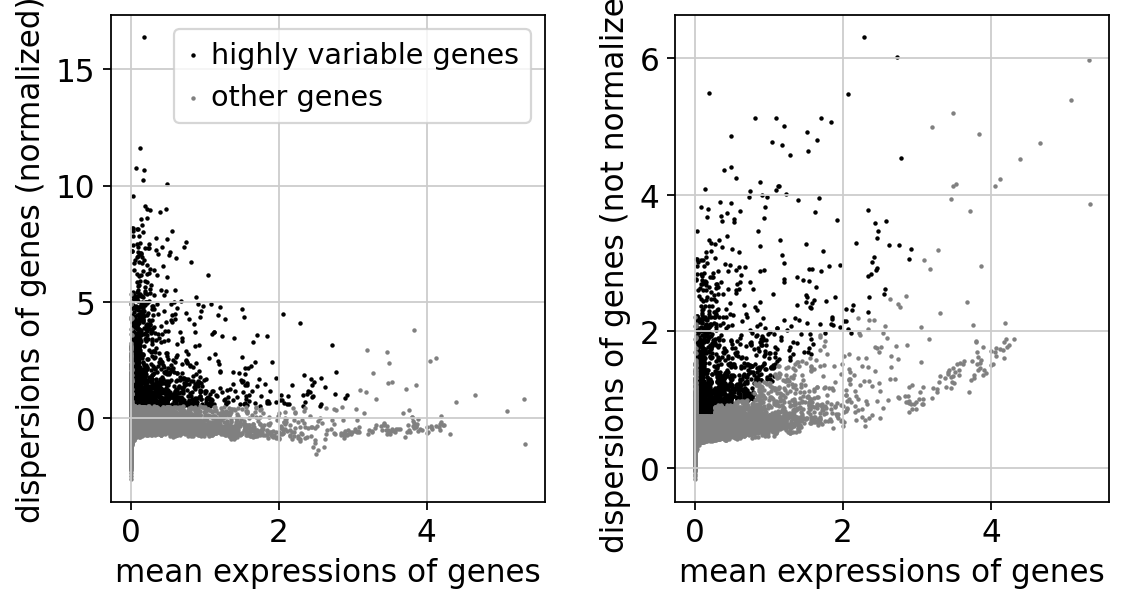

In [7]:
# Filter based on quality metrics
adata = adata[adata.obs['n_genes'] < 2500, :]  # Remove cells with too many genes
adata = adata[adata.obs['percent_mito'] < 5, :]  # Remove cells with high mitochondrial content

# Normalize data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)  # Log-transform data

# Step 2: Identification of highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

# Retain only highly variable genes
adata = adata[:, adata.var['highly_variable']]



# Optional: Save plots or export data


computing PCA
    with n_comps=50


    finished (0:00:00)


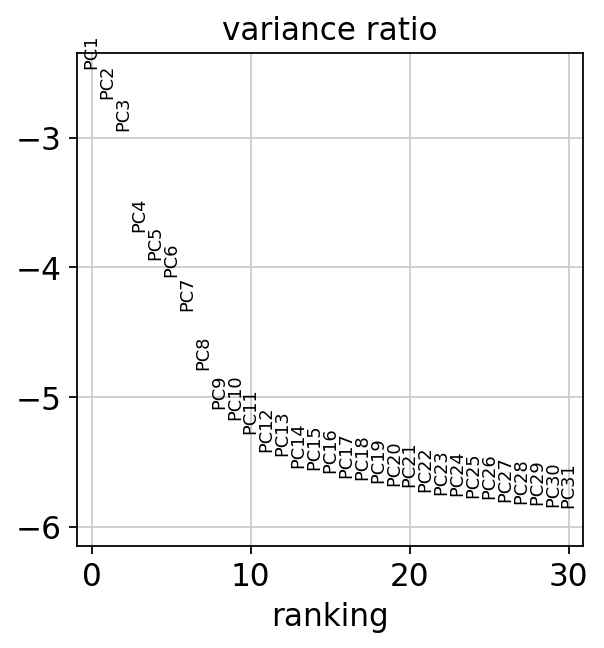

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:01)


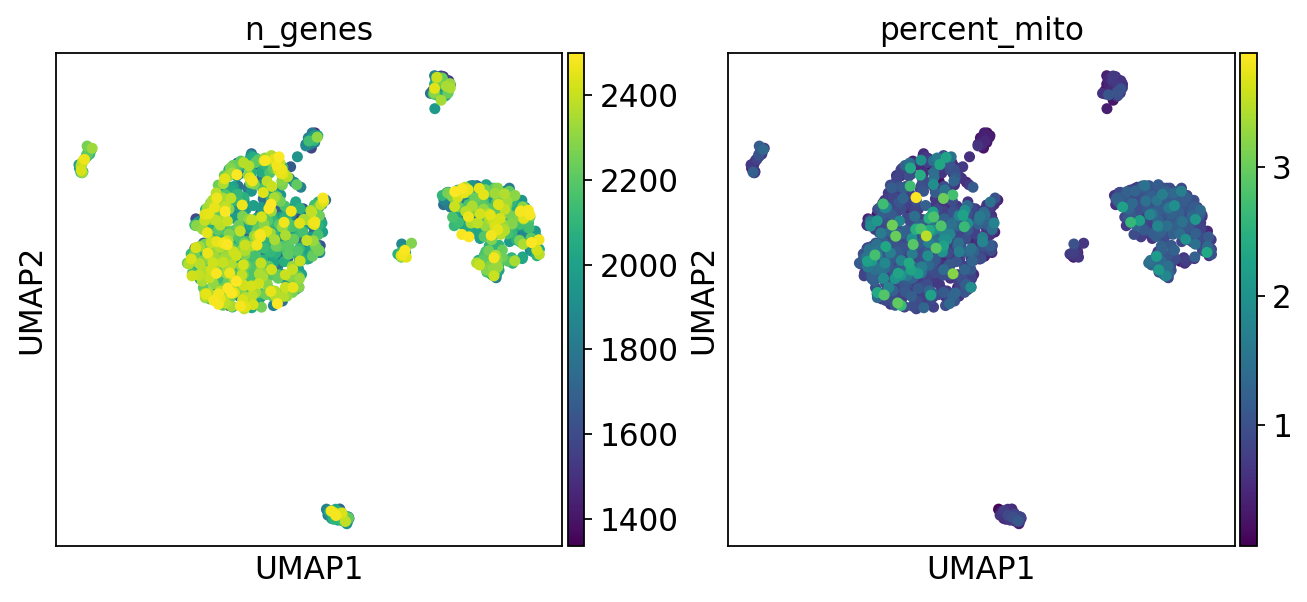

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/tmp/ipykernel_7593/4148680720.py:18: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


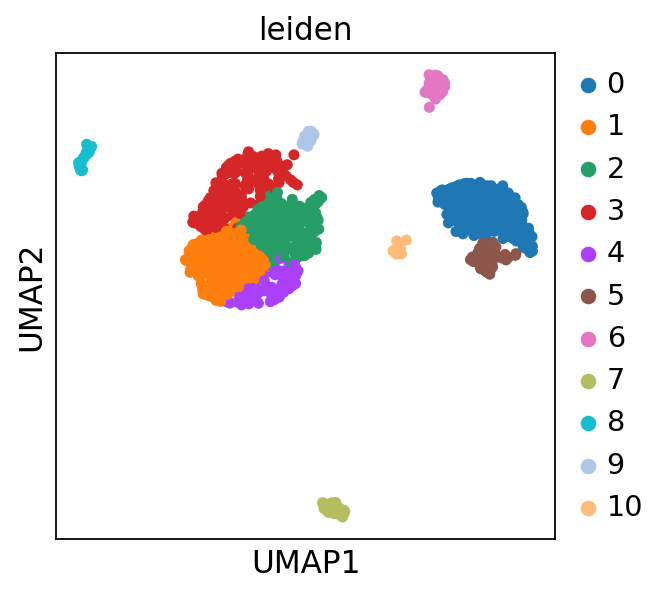

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/minknow/miniconda3/envs/snakemake-tutorial/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py

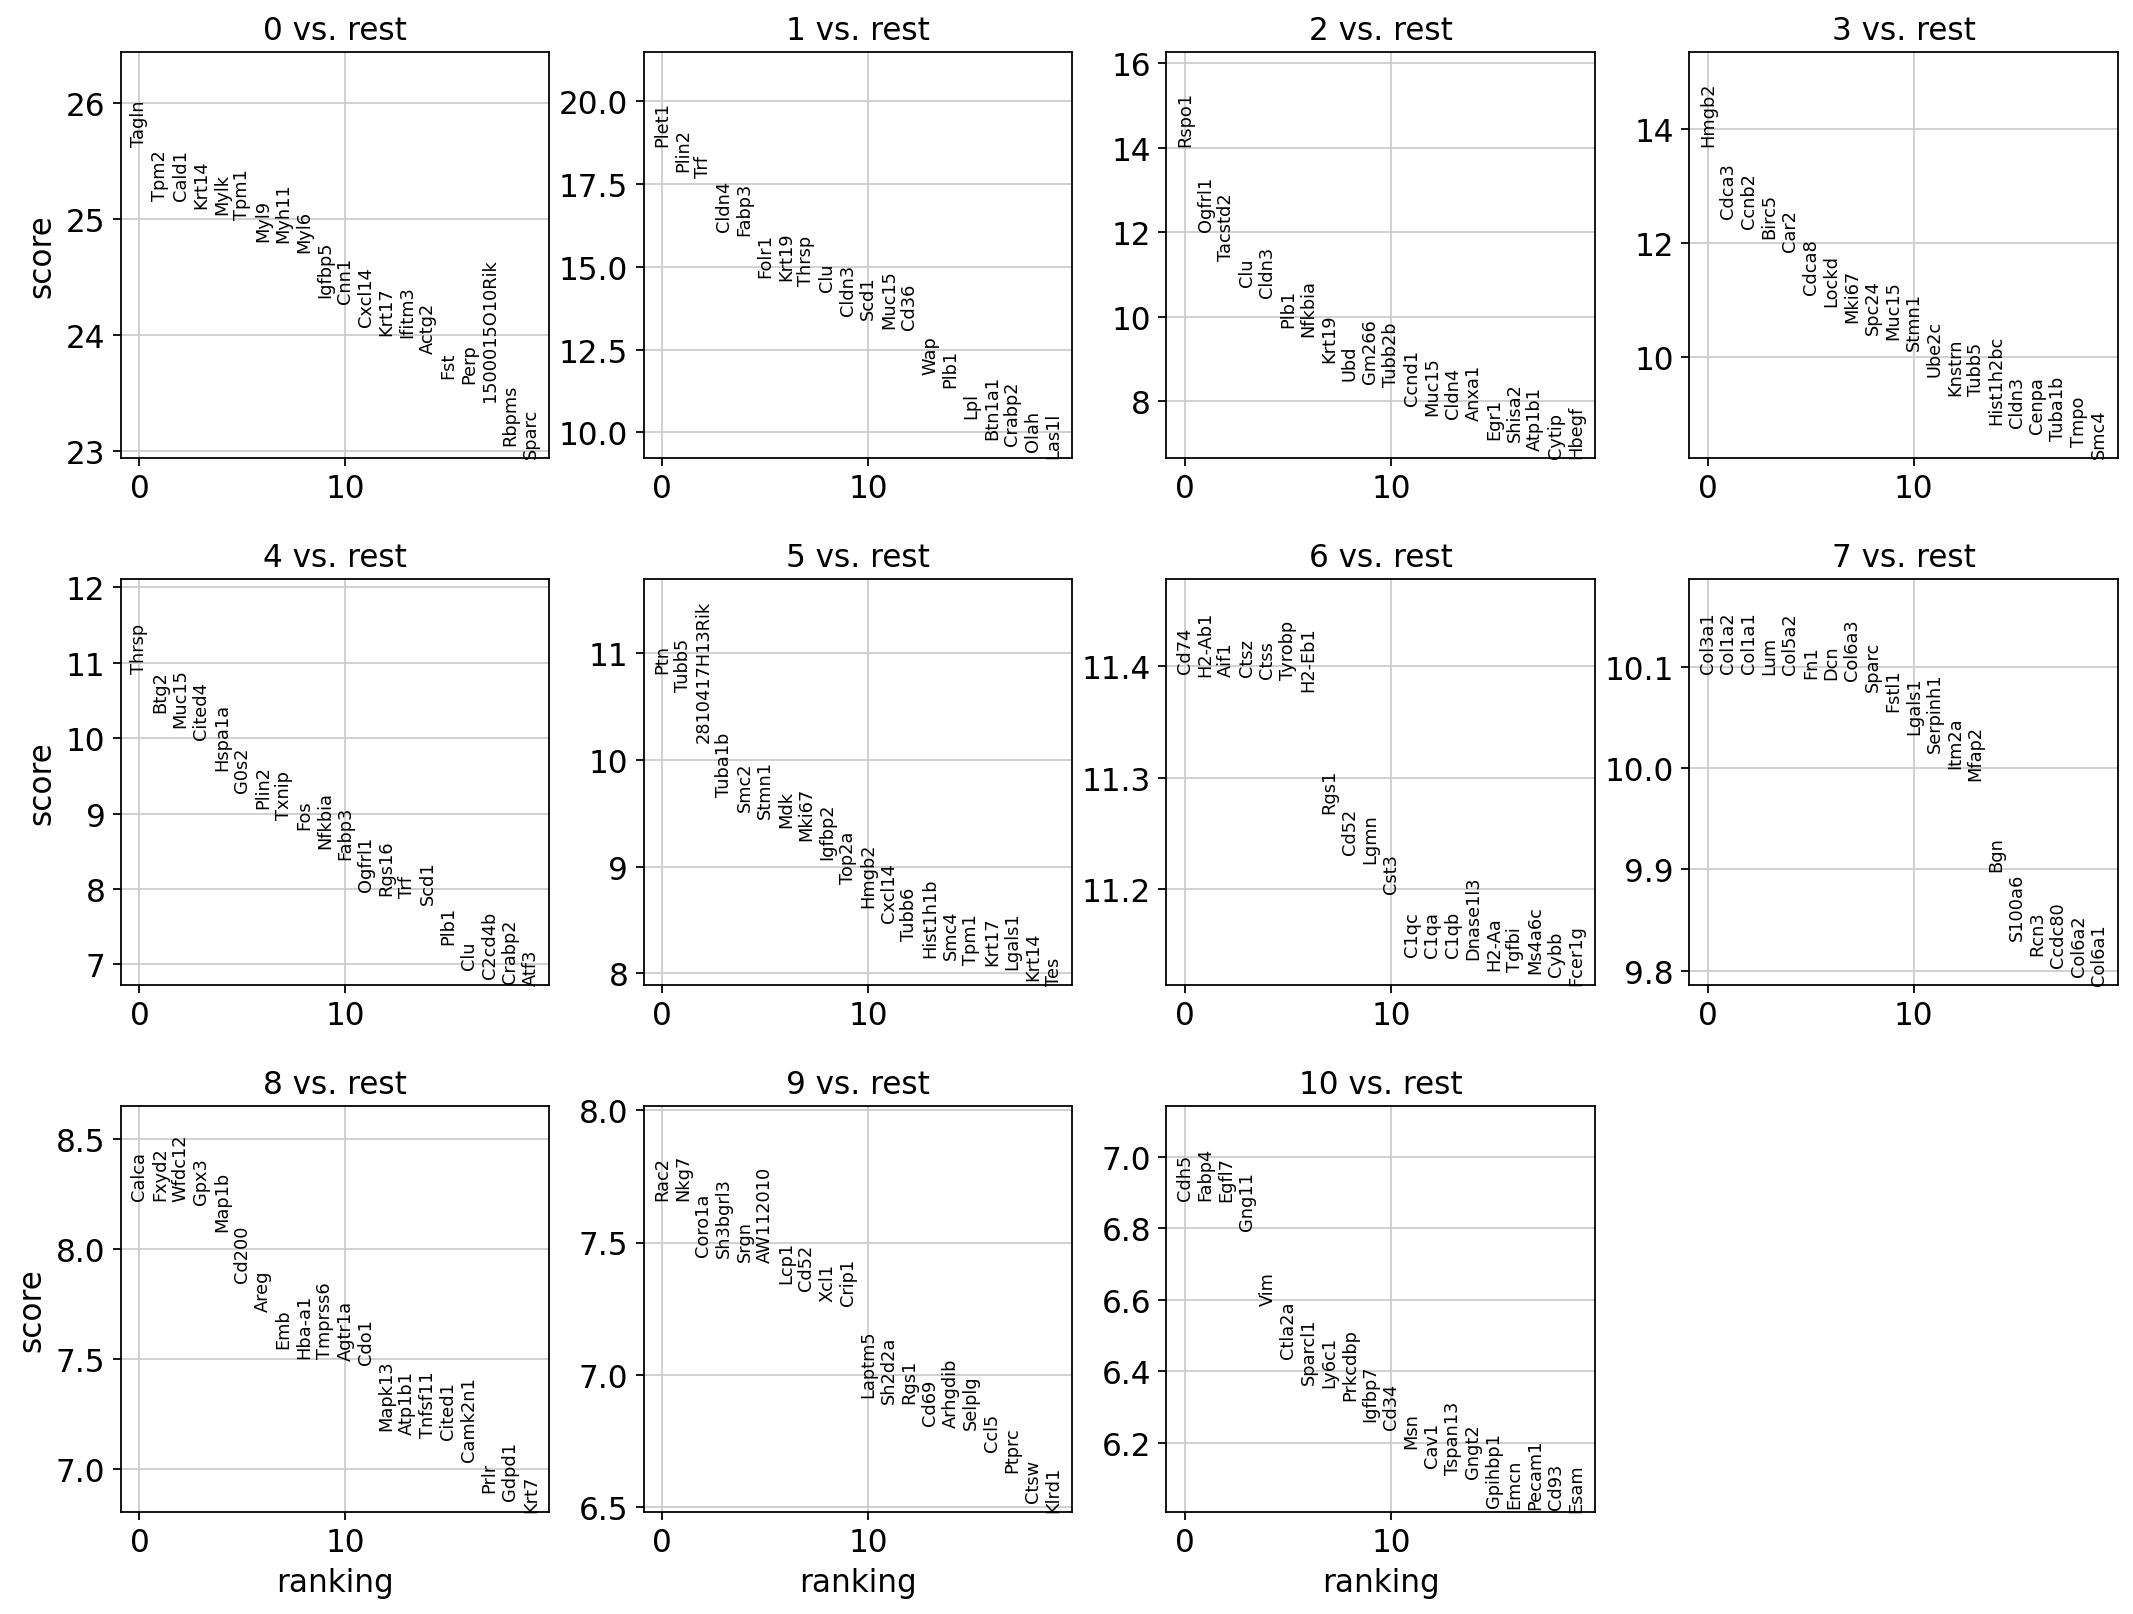

In [10]:
# Step 3: Dimensionality Reduction
# Scale the data
sc.pp.scale(adata, max_value=10)

# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

# Step 4: Clustering
# Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run UMAP for visualization
sc.tl.umap(adata)
sc.pl.umap(adata, color=['n_genes', 'percent_mito'])

# Clustering with Leiden algorithm
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])

# Step 5: Marker Gene Analysis
# Rank genes for each cluster using the Wilcoxon rank-sum test
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Step 6: Save Results
# Save processed data
processed_file_path = "processed_mouse_bach_mammarygland.h5ad"
adata.write(processed_file_path)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:01)


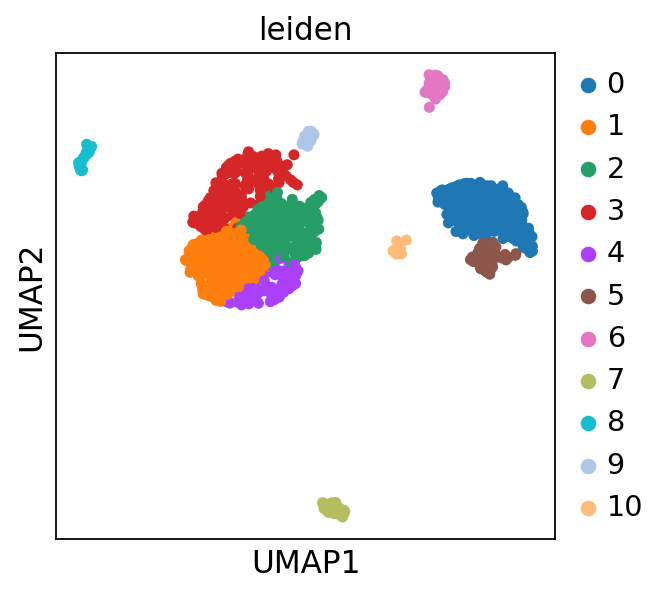

In [11]:
# Perform neighborhood graph computation
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run clustering
sc.tl.leiden(adata, resolution=0.5)  # Adjust resolution as needed

# Run UMAP for visualization
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden'])
